In [2]:
### from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import optimizers
train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')

from imblearn.over_sampling import SMOTE

def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
        

train_y = np_utils.to_categorical(train_y)
    
scaler = StandardScaler()
train_x[:] = scaler.fit_transform(train_x[:])
test_x[:] = scaler.fit_transform(test_x[:])   


##
smote = SMOTE(random_state=42)


train_x,train_y = smote.fit_resample(train_x, train_y)

##     
clf=Sequential()
clf.add(Dense(16, input_shape=(19,)))
clf.add(Dense(3, input_dim=4))
clf.add(Activation('softmax'))

from keras.callbacks import ModelCheckpoint
MODEL_SAVE_FOLDER_PATH = 'C:\성재\대외활동\유전자/model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)


sgd = optimizers.SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True)
Adadelta= optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
Nadam= optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
Adam = tf.keras.optimizers.Adam(    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.9,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam")
clf.compile(optimizer= Adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'] )

#clf.compile(optimizer=tf.keras.optimizers.Adam(), 
#              loss='categorical_crossentropy', 
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

clf.fit(train_x, train_y, epochs=10, batch_size=10,callbacks=[cb_checkpoint])

preds = clf.predict(test_x)
#preds = np.ravel(preds)


print('Done.')
#print(preds)

pred=[]
for i in range(175):
    a = np.argmax(preds[i])
    pred.append(a)
    
print(pred)


submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(pred)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)





Epoch 1/10


C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


35/35 [==============================] - 1s 2ms/step - loss: 0.2317 - accuracy: 0.9094
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9561
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9532
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9678
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9678
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9708
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9766
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9737
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9649
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Done.
[0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2,

In [ ]:
####GPT
### from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import optimizers
pip install xgboost
train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')

from imblearn.over_sampling import SMOTE

def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
        

train_y = np_utils.to_categorical(train_y)
    
scaler = StandardScaler()
train_x[:] = scaler.fit_transform(train_x[:])
test_x[:] = scaler.fit_transform(test_x[:])   


##
smote = SMOTE(random_state=42)


train_x,train_y = smote.fit_resample(train_x, train_y)

##     
clf=Sequential()
clf.add(Dense(32, input_shape=(19,)))
clf.add(Dense(16))
clf.add(Dense(8))
clf.add(Dense(3))
clf.add(Activation('softmax'))



from keras.callbacks import ModelCheckpoint
MODEL_SAVE_FOLDER_PATH = 'C:\성재\대외활동\유전자/model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)


sgd = optimizers.SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True)
Adadelta= optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
Nadam= optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
Adam = tf.keras.optimizers.Adam(    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.9,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam")
clf.compile(optimizer= Adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'] )

#clf.compile(optimizer=tf.keras.optimizers.Adam(), 
#              loss='categorical_crossentropy', 
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

clf.fit(train_x, train_y, epochs=10, batch_size=10,callbacks=[cb_checkpoint])

preds = clf.predict(test_x)
#preds = np.ravel(preds)


print('Done.')
#print(preds)

pred=[]
for i in range(175):
    a = np.argmax(preds[i])
    pred.append(a)
    
print(pred)


submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(pred)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)





In [32]:
#이상치 제거 outlier
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import io

train = pd.read_csv('C:\성재\대외활동\유전자\open/labelDF.csv')

#print(data[:21])
#데이터와 테스트셋이 제대로 나누어졌는지 확인
# 데이터 구조 확인
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')
#top4 battery_ power(0) px_height(11) px_width(12) ram(13)
#높은 feature 4개
# 0 11 12 13번째 
sns.boxplot(x='SNP_10_02', y='class2', data=train, axis=[0])

ValueError: Could not interpret input 'SNP_10_02'

In [13]:
#Q3 correlation
import pandas as pd
import matplotlib.pyplot as plt
import io

#myfile = files.upload()
# 데이터 로드
##2:8 비율로 train,test split

train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')

#test = test1.iloc[:400,:]
#data = data1.iloc[401:2000,:]
#print(data[:21])
print(train)
#데이터와 테스트셋이 제대로 나누어졌는지 확인
# 데이터 구조 확인
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)





class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]
snp_col.append(f'class')


snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    

train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

        
        ################

        
print(train_x)
print(train_y)

print(train_x.shape)       
print(train_y.shape)
print(train_x.ndim)
print(train_y.ndim)

        
#train2 = np.concatenate((train_x,train_y),axis=1)
        
corr1 = train_x.corr()
corr1.style.background_gradient(cmap='coolwarm')


#top4 battery_ power(0) px_height(11) px_width(12) ram(13)
#높은 feature 4개
# 0 11 12 13번째 

            id  father  mother  gender  trait SNP_01 SNP_02 SNP_03 SNP_04  \
0    TRAIN_000       0       0       0      2    G G    A G    A A    G A   
1    TRAIN_001       0       0       0      2    A G    A G    C A    A A   
2    TRAIN_002       0       0       0      2    G G    G G    A A    G A   
3    TRAIN_003       0       0       0      1    A A    G G    A A    G A   
4    TRAIN_004       0       0       0      2    G G    G G    C C    A A   
..         ...     ...     ...     ...    ...    ...    ...    ...    ...   
257  TRAIN_257       0       0       0      2    A G    A G    A A    G A   
258  TRAIN_258       0       0       0      2    G G    A A    C A    A A   
259  TRAIN_259       0       0       0      1    A G    G G    A A    G A   
260  TRAIN_260       0       0       0      1    A A    G G    A A    G A   
261  TRAIN_261       0       0       0      2    G G    A G    C A    G G   

    SNP_05  ... SNP_07 SNP_08 SNP_09 SNP_10 SNP_11 SNP_12 SNP_13 SNP_14  \


NameError: name 'preprocessing' is not defined

In [8]:
#Q3 foward selection
#foward selection이 r에서 쉽게 가능하다는 점 때문에
#import robject를 통해 r 코드를 실행시켜서 전진선택법을 실행하였다.
import rpy2.robjects as robjects

#data.info()
fws = robjects.r('''
  data<-read.csv("train.csv")
  min.model  <- lm(price_range ~ 1, data=data)
  full.model <- lm(price_range ~ ., data=data)

  min.model <- lm(price_range ~ 1, data=data)  # 최소 모델 지정(상수항)
  step(min.model,scope=list(lower=min.model,upper=full.model),direction = "forward")  
''')
print(fws)
print(type(fws))

ModuleNotFoundError: No module named 'rpy2'

In [6]:
#logisticv  smote적용
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler



   
train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')










def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)





class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
        
        

##
smote = SMOTE(random_state=42)

print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", train_x.shape, train_y.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(train_y).value_counts() )
train_x,train_y = smote.fit_resample(train_x, train_y)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", train_x.shape, train_y.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(train_y).value_counts() )

##    
    
    
    
clf = LogisticRegression()
clf.fit(train_x, train_y)

preds = clf.predict(test_x)
print('Done.')
submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)

#정답률 구하기
#ac_score = accuracy_score(train_y,preds)
#print("accuracy =",ac_score)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (262, 19) (262,)
SMOTE 적용 후 값의 분포 :
 1    114
2     79
0     69
dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (342, 19) (342,)
SMOTE 적용 후 값의 분포 :
 1    114
2    114
0    114
dtype: int64
Done.


C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
#logisticv  sadasyn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN


   
train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')










def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)





class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
##
#smote = SMOTE(random_state=42)
ada = ADASYN(random_state=42)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", train_x.shape, train_y.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(train_y).value_counts() )
train_x,train_y = ada.fit_resample(train_x, train_y)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", train_x.shape, train_y.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(train_y).value_counts() )

##    
    
    
    
clf = LogisticRegression()
clf.fit(train_x, train_y)

preds = clf.predict(test_x)
print('Done.')
submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)

#정답률 구하기
#ac_score = accuracy_score(train_y,preds)
#print("accuracy =",ac_score)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (262, 19) (262,)
SMOTE 적용 후 값의 분포 :
 1    114
2     79
0     69
dtype: int64


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import io

train = pd.read_csv('C:\성재\대외활동\유전자\open/labelDF.csv')

#print(data[:21])
print(train)
#데이터와 테스트셋이 제대로 나누어졌는지 확인
# 데이터 구조 확인
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')
#top4 battery_ power(0) px_height(11) px_width(12) ram(13)
#높은 feature 4개
# 0 11 12 13번째 

     father  mother  gender  trait  class2  SNP_01_2  SNP_02_2  SNP_03_2  \
0         0       0       0      2     0.0       0.0       1.0       0.0   
1         0       0       0      2     1.0       1.0       1.0       1.0   
2         0       0       0      2     0.0       0.0       0.0       0.0   
3         0       0       0      1     2.0       2.0       0.0       0.0   
4         0       0       0      2     1.0       0.0       0.0       2.0   
..      ...     ...     ...    ...     ...       ...       ...       ...   
257       0       0       0      2     0.0       1.0       1.0       0.0   
258       0       0       0      2     1.0       0.0       2.0       1.0   
259       0       0       0      1     2.0       1.0       0.0       0.0   
260       0       0       0      1     2.0       2.0       0.0       0.0   
261       0       0       0      2     0.0       0.0       1.0       1.0   

     SNP_04_2  SNP_05_2  ...  SNP_07_2  SNP_08_2  SNP_09_2  SNP_10_2  \
0         1.0  

C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,father,mother,gender,trait,class2,SNP_01_2,SNP_02_2,SNP_03_2,SNP_04_2,SNP_05_2,SNP_06_2,SNP_07_2,SNP_08_2,SNP_09_2,SNP_10_2,SNP_11_2,SNP_12_2,SNP_13_2,SNP_14_2,SNP_15_2,id2
father,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mother,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gender,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
trait,nan,nan,nan,1.000000,-0.856601,-0.732876,0.558326,0.568742,-0.604016,0.548950,0.042484,-0.534567,0.069381,-0.687985,-0.659007,-0.487578,-0.757190,0.562392,-0.711358,-0.611526,0.009338
class2,nan,nan,nan,-0.856601,1.000000,0.690246,-0.326087,-0.548756,0.350620,-0.696057,-0.014401,0.561887,-0.217203,0.523048,0.744150,0.405909,0.632103,-0.624125,0.699577,0.607601,-0.013358
SNP_01_2,nan,nan,nan,-0.732876,0.690246,1.000000,-0.367094,-0.471602,0.384073,-0.449491,-0.062105,0.381710,-0.047479,0.460103,0.508486,0.317214,0.566140,-0.391330,0.554781,0.449802,-0.078967
SNP_02_2,nan,nan,nan,0.558326,-0.326087,-0.367094,1.000000,0.260399,-0.405666,0.119215,0.099672,-0.230618,0.010296,-0.410250,-0.262874,-0.213645,-0.460557,0.167716,-0.344393,-0.346374,0.012299
SNP_03_2,nan,nan,nan,0.568742,-0.548756,-0.471602,0.260399,1.000000,-0.341657,0.282002,0.011163,-0.345695,0.199964,-0.417378,-0.472261,-0.206484,-0.362384,0.273851,-0.471268,-0.297153,-0.003546
SNP_04_2,nan,nan,nan,-0.604016,0.350620,0.384073,-0.405666,-0.341657,1.000000,-0.260659,0.028111,0.282725,0.045813,0.513975,0.298976,0.266024,0.413249,-0.265730,0.433585,0.291331,0.021994
SNP_05_2,nan,nan,nan,0.548950,-0.696057,-0.449491,0.119215,0.282002,-0.260659,1.000000,0.036063,-0.347199,0.104318,-0.346092,-0.456613,-0.246446,-0.407211,0.527582,-0.417456,-0.357879,0.008942


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:\성재\대외활동\유전자\open/labelDF.csv')
# Feature, target 분리
df = data.drop(columns = {'class2'})
target = data['class2']

# train, test 데이터 분리 (8 : 2)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, shuffle=True, random_state=34)

# 연료 변수가 object이므로 더미화 진행 (type : 3개)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 class2   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     121.2
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.71e-92
Time:                        15:28:43   Log-Likelihood:                 2.8312
No. Observations:                 209   AIC:                             30.34
Df Residuals:                     191   BIC:                             90.50
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6568      0.272      9.764      0.0

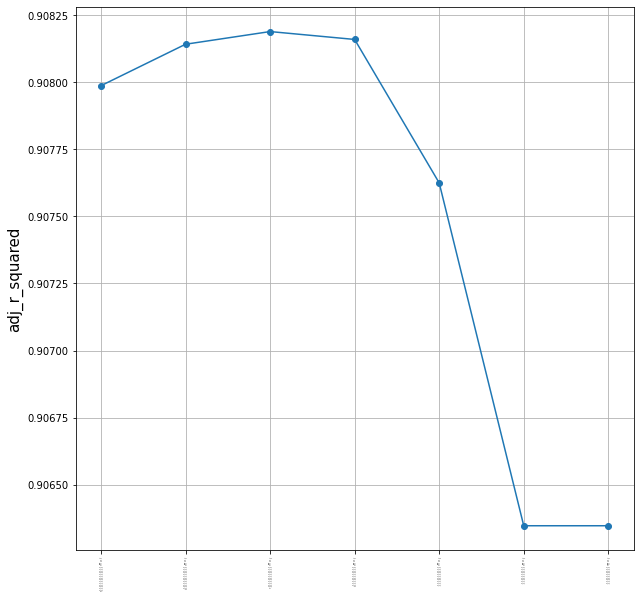

In [9]:
#후진제거법
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_out = 0.05, # P-value 임계값 (제거 기준)
                           feature_list = X_train.columns.tolist()
                           ):
    
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature_list
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
      
    return included,step,steps,adj_r_squared_list,sv_per_step


backward_valriables_function,step,steps,adj_r_squared_list,sv_per_step = backward_regression(X_train, y_train)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps, adj_r_squared_list, marker='o')
    
plt.ylabel('adj_r_squared',fontsize=font_size)
plt.grid(True)
plt.show()


In [8]:

model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[backward_valriables_function]))).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 class2   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           3.14e-97
Time:                        15:30:53   Log-Likelihood:                -1.8351
No. Observations:                 209   AIC:                             27.67
Df Residuals:                     197   BIC:                             67.78
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4146      0.212     11.382      0.0

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(X_test[backward_valriables_function])

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


KeyError: "['const'] not in index"

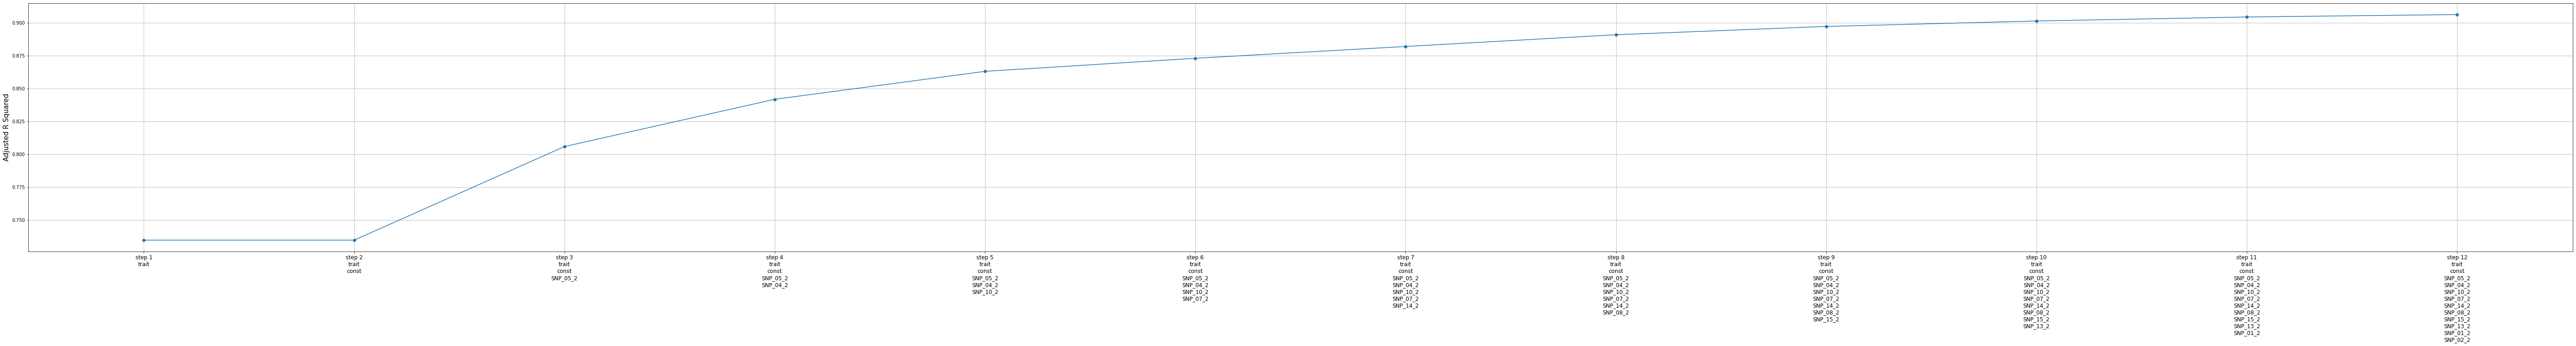

In [77]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X_train, y_train)

In [2]:
#logistic #정규화
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


# 다중분류 문제 해결
# 라이브러리 설정
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

class CFG:
    SEED = 42
    
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정
   
train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')




def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
    

scaler = MinMaxScaler()
train_x[:] = scaler.fit_transform(train_x[:])
test_x[:] = scaler.fit_transform(test_x[:])

Y_obj= test_x
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)


Y_encoded = np_utils.to_categorical(train_y)

# softmax 활성화함수
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation="softmax"))

# model compile
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(train_x, Y_encoded, epochs=60, batch_size = 5)



preds = model.predict(test_x)
print('Done.')
submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)

#정답률 구하기
#ac_score = accuracy_score(train_y,preds)
#print("accuracy =",ac_score)

ValueError: y should be a 1d array, got an array of shape (175, 19) instead.

In [100]:
###합해본것
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')


def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
        

train_y = np_utils.to_categorical(train_y)
    
scaler = StandardScaler()
train_x[:] = scaler.fit_transform(train_x[:])
test_x[:] = scaler.fit_transform(test_x[:])   
    
clf=Sequential()
clf.add(Dense(8, input_shape=(19,)))
clf.add(Dense(3, input_dim=3))
clf.add(Activation('sigmoid'))

#clf.add(Activation('sigmoid'))
clf.add(Activation('softmax'))

clf.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#clf.compile(optimizer=tf.keras.optimizers.Adam(),
#              loss='categorical_crossentropy', 
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

clf.fit(train_x, train_y, epochs=50, batch_size=4)

preds = clf.predict(test_x)
print('Done.')
print(preds)
submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)

Epoch 1/50
66/66 [==============================] - 0s 1ms/step - loss: 0.9472 - accuracy: 0.7214
Epoch 2/50
66/66 [==============================] - 0s 1ms/step - loss: 0.8560 - accuracy: 0.7977
Epoch 3/50
66/66 [==============================] - 0s 1ms/step - loss: 0.7997 - accuracy: 0.8397
Epoch 4/50
66/66 [==============================] - 0s 1ms/step - loss: 0.7604 - accuracy: 0.8664
Epoch 5/50
66/66 [==============================] - 0s 1ms/step - loss: 0.7322 - accuracy: 0.8931
Epoch 6/50
66/66 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.9198
Epoch 7/50
66/66 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.9237
Epoch 8/50
66/66 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.9237
Epoch 9/50
66/66 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.9313
Epoch 10/50
66/66 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.9351
Epoch 11/50
66/66 [

ValueError: y should be a 1d array, got an array of shape (175, 3) instead.

In [66]:
###### from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import layers  
from keras import models
train = pd.read_csv('C:\성재\대외활동\유전자\open/train.csv')
test = pd.read_csv('C:\성재\대외활동\유전자\open/test.csv')

def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
        

#train_y = np_utils.to_categorical(train_y)
    
scaler = StandardScaler()
train_x[:] = scaler.fit_transform(train_x[:])
test_x[:] = scaler.fit_transform(test_x[:])   
    
  
    
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(19,)))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=20, batch_size=7)
#results = model.evaluate(x_test, y_test)


clf= model
print(clf)
preds = clf.predict(test_x)
print('Done.')
submit = pd.read_csv('C:\성재\대외활동\유전자\open/sample_submission.csv')
submit['class'] = class_le.inverse_transform(preds)
submit.to_csv('C:\성재\대외활동\유전자\open/answer/submit.csv', index=False)


Epoch 1/20
38/38 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.2977
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.4466
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.6336
Epoch 4/20
38/38 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.6947
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.6947
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.6947
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.6985
Epoch 8/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.6985
Epoch 9/20
38/38 [==============================] - 0s 1ms/step - loss: -0.0633 - accuracy: 0.6985
Epoch 10/20
38/38 [==============================] - 0s 2ms/step - loss: -0.2023 - accuracy: 0.6985
Epoch 11/20
38/38

C:\Users\tonya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [5.0668485e-05 5.3865620e-05 5.7386726e-05 5.8308280e-05 7.3187119e-05
 7.6801931e-05 8.6129090e-05 8.8418099e-05 8.8844674e-05 9.6125157e-05
 1.0459822e-04 1.0852767e-04 1.1701671e-04 1.3362602e-04 1.3369381e-04
 1.4036307e-04 1.4095995e-04 1.4414918e-04 1.4985327e-04 1.5562135e-04
 1.8004258e-04 1.9244023e-04 2.0716246e-04 2.1303253e-04 2.8504140e-04
 2.9773841e-04 3.0833163e-04 3.0959406e-04 3.2861560e-04 3.8942898e-04
 3.9274074e-04 4.0871860e-04 4.4042006e-04 4.7922687e-04 5.0140318e-04
 6.7263580e-04 7.1074185e-04 9.4177300e-04 1.0181916e-03 1.1916432e-03
 1.2854554e-03 1.4787448e-03 1.6320087e-03 1.8242144e-03 1.9526724e-03
 1.9690448e-03 2.5045888e-03 4.0703486e-03 4.5466255e-03 6.8272226e-03
 5.4621432e-02 9.9048883e-01 9.9274921e-01 9.9419892e-01 9.9431783e-01
 9.9679381e-01 9.9712372e-01 9.9717730e-01 9.9794459e-01 9.9823922e-01
 9.9841225e-01 9.9843991e-01 9.9869329e-01 9.9873662e-01 9.9894804e-01
 9.9909139e-01 9.9909890e-01 9.9926823e-01 9.9939978e-01 9.9943602e-01
 9.9946815e-01 9.9957579e-01 9.9958318e-01 9.9959254e-01 9.9961501e-01
 9.9962038e-01 9.9964738e-01 9.9970806e-01 9.9971515e-01 9.9973500e-01
 9.9975026e-01 9.9978137e-01 9.9978334e-01 9.9979216e-01 9.9979442e-01
 9.9981612e-01 9.9981767e-01 9.9981910e-01 9.9982834e-01 9.9983788e-01
 9.9983954e-01 9.9984515e-01 9.9984860e-01 9.9985611e-01 9.9986154e-01
 9.9986410e-01 9.9986881e-01 9.9987644e-01 9.9989474e-01 9.9990618e-01
 9.9991697e-01 9.9991798e-01 9.9992192e-01 9.9992687e-01 9.9993050e-01
 9.9993557e-01 9.9994332e-01 9.9994624e-01 9.9994940e-01 9.9995518e-01
 9.9995857e-01 9.9996072e-01 9.9996603e-01 9.9997121e-01 9.9997413e-01
 9.9998003e-01 9.9998063e-01 9.9998146e-01 9.9998200e-01 9.9998313e-01
 9.9998331e-01 9.9998349e-01 9.9998456e-01 9.9998659e-01 9.9998671e-01
 9.9998838e-01 9.9998885e-01 9.9999005e-01 9.9999088e-01 9.9999130e-01
 9.9999136e-01 9.9999142e-01 9.9999213e-01 9.9999243e-01 9.9999380e-01
 9.9999410e-01 9.9999452e-01 9.9999475e-01 9.9999499e-01 9.9999547e-01
 9.9999619e-01 9.9999636e-01 9.9999690e-01 9.9999738e-01 9.9999791e-01
 9.9999797e-01 9.9999803e-01 9.9999827e-01 9.9999893e-01 9.9999899e-01
 9.9999905e-01 9.9999923e-01 9.9999928e-01 9.9999934e-01 9.9999964e-01
 9.9999970e-01 9.9999976e-01 9.9999982e-01 9.9999988e-01 9.9999994e-01]